In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import re 
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
import warnings
warnings.filterwarnings('ignore')

In [2]:
elon_musk = pd.read_csv('Elon_musk.csv', encoding = 'cp1252')
elon_musk.head()

,Unnamed: 0,Text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [3]:
df = elon_musk.drop('Unnamed: 0',axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    1999 non-null   object
dtypes: object(1)
memory usage: 15.7+ KB


In [4]:
df.Text = df.Text.astype(str)

# Preprocessing Data

In [5]:
# Clean The Data using RegExp

def cleantext(text):
    text = re.sub(r"@[A-Za-z0-9]+", "", text) # Remove Mentions
    text = re.sub(r"#", "", text) # Remove Hashtags Symbol
    text = re.sub(r"RT[\s]+", "", text) # Remove Retweets
    text = re.sub(r"https?:\/\/\S+", "", text) # Remove The Hyper Link
    text = re.sub(r"_[A-Za-z0-9]", "", text)#Removing underscores
    return text

In [6]:
df["Text"] = df["Text"].apply(cleantext)
df.head()

,Text
0,I’m an alien
1,Aarmack Ray tracing on Cyberpunk with HDR is n...
2,Great interview!
3,Doge is underestimated
4,Congratulations Tesla China for amazing execu...


In [7]:
df.tail()

,Text
1994,"True, it sounds so surreal, but the negative ..."
1995,Make sure to read ur terms &amp; conditions b...
1996,Samwise Gamgee
1997,Altho Dumb and Dumber is <U+0001F525><U+0001F...
1998,Progress update August 28


In [8]:
# nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentialz = SentimentIntensityAnalyzer()

In [9]:
sentialz.polarity_scores(df.Text.iloc[2])

{'neg': 0.0, 'neu': 0.185, 'pos': 0.815, 'compound': 0.6588}

In [10]:
#Function to retrieve sentiment class
def get_senti_class(review): 
    analysis = sentialz.polarity_scores(review)
    # set sentiment 
    if analysis["compound"] > 0: 
        return 'positive'
    elif analysis["compound"] < 0: 
        return 'negative'
    else: 
        return 'neutral'
    
def get_sentiment(review):
    return pd.Series([sentialz.polarity_scores(review),get_senti_class(review)])

In [11]:
df[["Scores", "Sentiment"]] = df.Text.apply(get_sentiment)
df.head()

,Text,Scores,Sentiment
0,I’m an alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral
1,Aarmack Ray tracing on Cyberpunk with HDR is n...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral
2,Great interview!,"{'neg': 0.0, 'neu': 0.185, 'pos': 0.815, 'comp...",positive
3,Doge is underestimated,"{'neg': 0.512, 'neu': 0.488, 'pos': 0.0, 'comp...",negative
4,Congratulations Tesla China for amazing execu...,"{'neg': 0.0, 'neu': 0.628, 'pos': 0.372, 'comp...",positive


In [12]:
df.Sentiment.value_counts()

neutral     888
positive    879
negative    232
Name: Sentiment, dtype: int64

In [13]:
comp_values = [d.get('compound') for d in df.Scores]

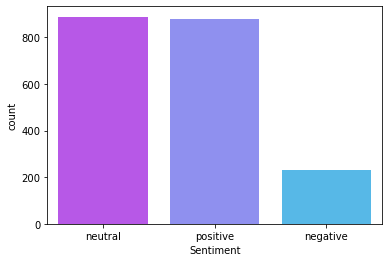

In [14]:
# There are very less negative comments
sns.countplot(df.Sentiment, palette = 'cool_r');

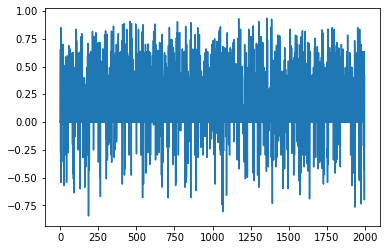

In [15]:
# Most are positive/Neutral tweets
sns.lineplot(data = comp_values, palette = 'cool_r');

In [16]:
df.loc[df.Sentiment == 'negative'].head()

,Text,Scores,Sentiment
3,Doge is underestimated,"{'neg': 0.512, 'neu': 0.488, 'pos': 0.0, 'comp...",negative
6,"Frodo was the underdoge,\nAll thought he would...","{'neg': 0.226, 'neu': 0.774, 'pos': 0.0, 'comp...",negative
15,"He definitely has issues, but the sentencing ...","{'neg': 0.162, 'neu': 0.681, 'pos': 0.157, 'co...",negative
20,Any crypto wallet that won’t give you your pr...,"{'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'comp...",negative
21,Your app sucks,"{'neg': 0.556, 'neu': 0.444, 'pos': 0.0, 'comp...",negative


# Word Cloud

In [17]:
tweet_str = ' '.join(df['Text'].tolist())

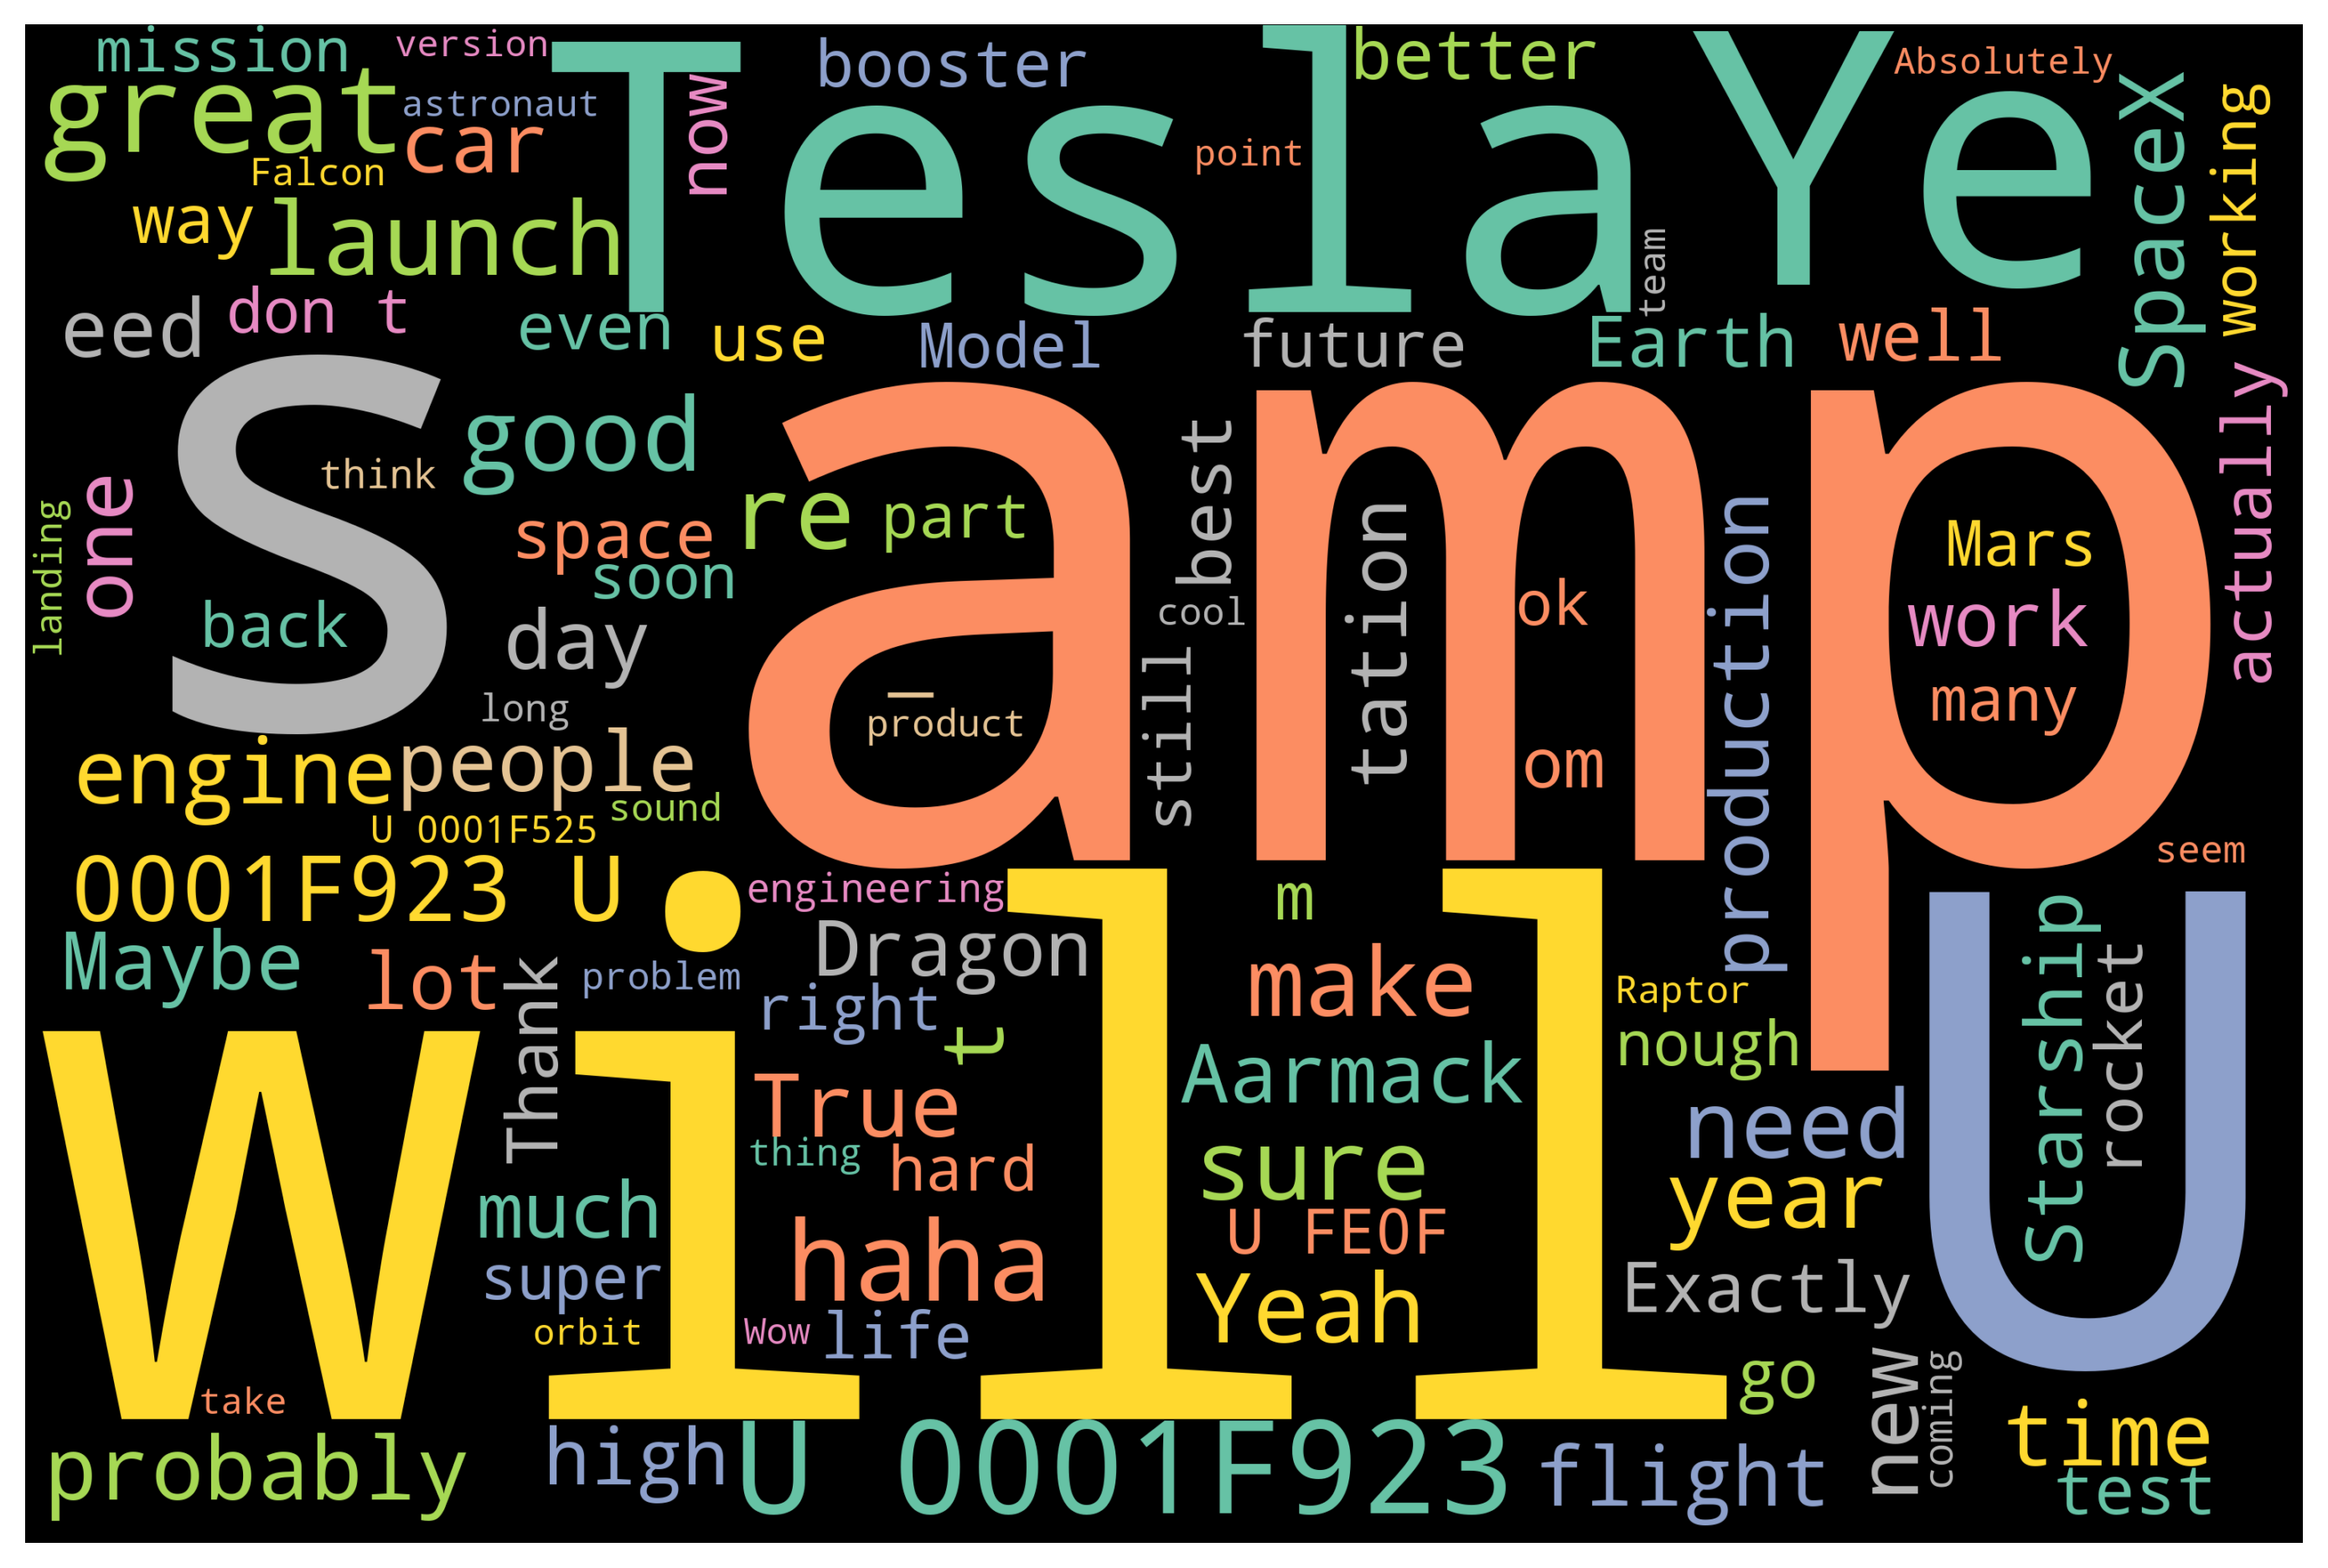

In [18]:
# Creating a WordCloud
from matplotlib.pyplot import figure
wordcloud_ip = WordCloud(width = 3000, height = 2000, background_color = "black", max_words = 100, colormap = 'Set2').generate(tweet_str)
figure(figsize = (15,8), dpi = 300)
plt.imshow(wordcloud_ip,interpolation = "bilinear")
plt.axis("off")
plt.show()